# **Análise exploratória em cima de uma base de dados de vendas**

In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
# Upload do arquivo
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [4]:
# Criando o nosso DataFrame
df = pd.read_excel('AdventureWorks.xlsx')

In [6]:
# Vizualizando as 5 primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [7]:
# Quantidades de linhas e colunas
df.shape

(904, 16)

In [9]:
# Verificando os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [14]:
# Valor receita total
df['Valor Venda'].sum()

5984606.1426

In [16]:
# Qual o custo total?
df['Custo'] = df['Custo Unitário'].mul(df['Quantidade']) # Criando a coluna de custo

In [17]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [18]:
# Qual é o custo total?
round(df['Custo'].sum(), 2) # Arredondei o valor para 2 casa decimais


2486783.05

In [19]:
# Agora que tamos receita, custo e total, podemos achar o lucro total
# Vamos criar uma coluna de custo que será receita - custo
df['Lucro'] = df['Valor Venda'] - df['Custo']

In [21]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [27]:
# Total lucro
round(df['Lucro'].sum(), 2)

3497823.09

In [28]:
# Criando uma coluna com o total de dias para enviar o produto
df['Tempo_Envio'] = df['Data Envio'] - df['Data Venda']

In [29]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


# **Queremos saber o tempo médio de envio para cada marca, e para isso precisamos transformar a coluna Tempo_Envio em numerica**

In [30]:
# extraindo apenas os dias
df['Tempo_Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [31]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [32]:
# Verificando o tipo da coluna Tempo_Envio
df['Tempo_Envio'].dtype

dtype('int64')

In [33]:
# Média de tempo de envio por marca
df.groupby('Marca')['Tempo_Envio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_Envio, dtype: float64

# **Missing Values**

In [34]:
# Verificando se tamos dados faltantes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_Envio       0
dtype: int64

# **E se quisermos saber o lucro por an e por marca**


In [58]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [38]:
# Vamos agrupar por ano e por marca
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [37]:
# Mostrar os números formatados tirando a notação ciêntifica
pd.options.display.float_format = '{:20,.2f}'.format

In [39]:
# Resetando o index
Lucro_Ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()
Lucro_Ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [41]:
# Qual o total de produtos vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

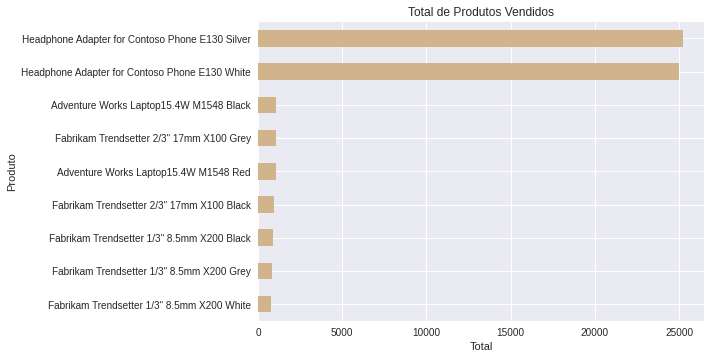

In [45]:
# Gráfico total de produtos vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True).plot.barh(title='Total de Produtos Vendidos', color='tan')
plt.xlabel('Total')
plt.ylabel('Produto');

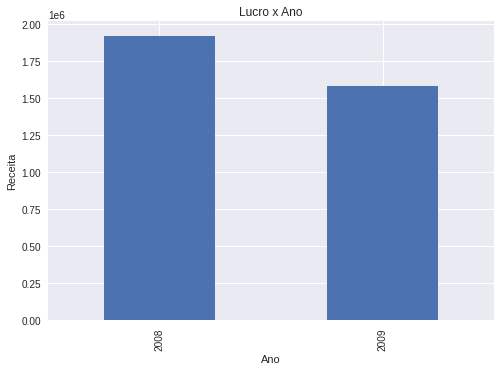

In [46]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(title='Lucro x Ano')
plt.xlabel('Ano')
plt.ylabel('Receita');

In [47]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [59]:
# Selecionando apenas as vendas do ano de 2009
df_2009 = df[df['Data Venda'].dt.year == 2009]

In [60]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


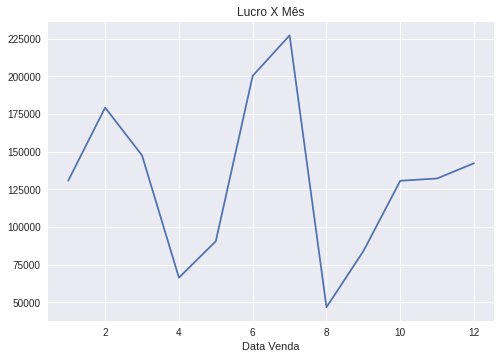

In [61]:
df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot(title='Lucro X Mês');

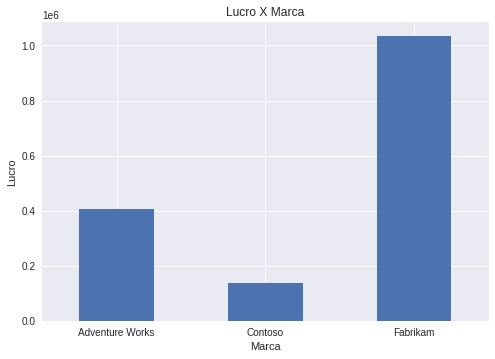

In [63]:
df_2009.groupby('Marca')['Lucro'].sum().plot.bar(title='Lucro X Marca')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

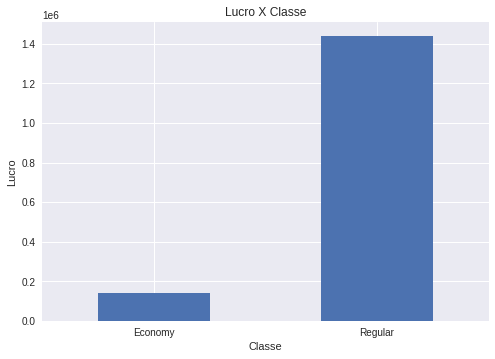

In [64]:
df_2009.groupby('Classe')['Lucro'].sum().plot.bar(title='Lucro X Classe')
plt.xlabel('Classe')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

In [65]:
# Retornar algumas analises estatisticas
df['Tempo_Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_Envio, dtype: float64

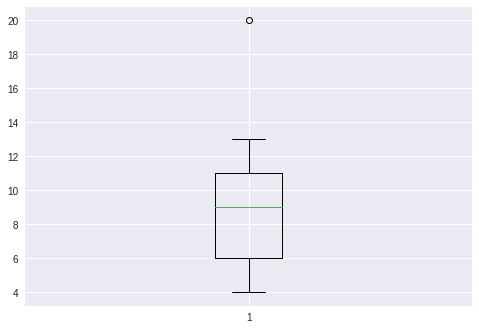

In [66]:
# Gráfico de box plot
plt.boxplot(df['Tempo_Envio']);

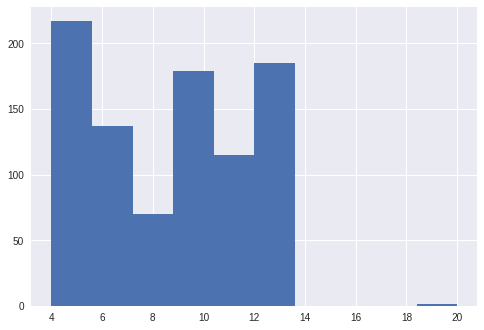

In [67]:
# Histograma
plt.hist(df['Tempo_Envio']);

In [68]:
# Tempo minimo de envio
df['Tempo_Envio'].min()

4

In [69]:
# Tempo maximo de envio
df['Tempo_Envio'].max()

20

In [70]:
# Indentificando o outlier
df[df['Tempo_Envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [72]:
# Salvar em planilha
df.to_csv('df_vendas_novo.csv', index=False)